In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
import wrangle

from wrangle import wrangle_telco

from wrangle import split

In [3]:
df = wrangle_telco()

In [4]:
df = df.set_index("customer_id")

In [5]:
df.head()

,monthly_charges,tenure,total_charges
customer_id,,,
0013-SMEOE,109.70,71,7904.25
0014-BMAQU,84.65,63,5377.80
0016-QLJIS,90.45,65,5957.90
0017-DINOC,45.20,54,2460.55
0017-IUDMW,116.80,72,8456.75


In [6]:
df.shape

(1685, 3)

In [7]:
train, validate, test = split(df)

In [8]:
train.head()

,monthly_charges,tenure,total_charges
customer_id,,,
6586-MYGKD,76.95,70,5289.80
1270-XKUCC,19.70,30,599.25
6425-JWTDV,19.25,48,855.10
6916-HIJSE,84.85,65,5459.20
8173-RXAYP,19.70,24,452.55


In [9]:
train.shape

(943, 3)

In [10]:
validate.head()

,monthly_charges,tenure,total_charges
customer_id,,,
5707-ZMDJP,69.70,53,3729.60
4827-DPADN,83.30,72,6042.70
1897-OKVMW,90.60,64,5817.45
8990-YOZLV,66.90,69,4577.90
3428-MMGUB,89.55,60,5231.20


In [11]:
validate.shape

(405, 3)

In [12]:
test.head()

,monthly_charges,tenure,total_charges
customer_id,,,
1904-WAJAA,64.35,24,1558.65
4835-YSJMR,49.80,39,1971.15
7771-CFQRQ,63.80,47,3007.25
5702-KVQRD,82.55,71,5832.65
3796-ENZGF,67.25,63,4234.15


In [13]:
test.shape

(337, 3)

# 1. Apply the scalers we talked about in this lesson to your data and visualize the results in a way that can .

## Min-Max

In [14]:
# Make the thing
minmaxscaler = sklearn.preprocessing.MinMaxScaler()

In [15]:
# We fit on the training data
# in a way, we treat our scalers like our ML models
# we only .fit on the training data
minmaxscaler.fit(train)

MinMaxScaler()

In [16]:
train_scaled_mm = minmaxscaler.transform(train)
validate_scaled_mm = minmaxscaler.transform(validate)
test_scaled_mm = minmaxscaler.transform(test)

In [17]:
train_scaled_mm[0:5]

array([[0.5822089 , 0.97183099, 0.60903259],
       [0.009995  , 0.4084507 , 0.06689783],
       [0.00549725, 0.66197183, 0.09646902],
       [0.66116942, 0.90140845, 0.62861188],
       [0.009995  , 0.32394366, 0.04994221]])

In [18]:
train[0:5]

,monthly_charges,tenure,total_charges
customer_id,,,
6586-MYGKD,76.95,70,5289.80
1270-XKUCC,19.70,30,599.25
6425-JWTDV,19.25,48,855.10
6916-HIJSE,84.85,65,5459.20
8173-RXAYP,19.70,24,452.55


In [19]:
# turn the numpy arrays into dataframes
train_scaled_mm = pd.DataFrame(train_scaled_mm, columns=train.columns)
validate_scaled_mm = pd.DataFrame(validate_scaled_mm, columns=train.columns)
test_scaled_mm = pd.DataFrame(test_scaled_mm, columns=train.columns)

In [20]:
train_scaled_mm.head()

,monthly_charges,tenure,total_charges
0,0.582209,0.971831,0.609033
1,0.009995,0.408451,0.066898
2,0.005497,0.661972,0.096469
3,0.661169,0.901408,0.628612
4,0.009995,0.323944,0.049942


Text(0.5, 1.0, 'Scaled')

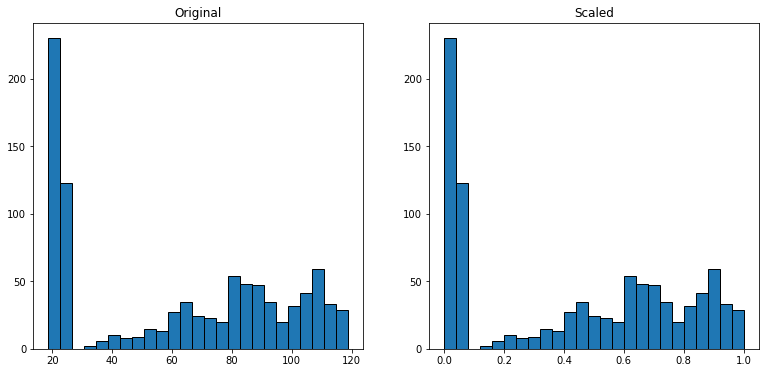

In [21]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_mm.monthly_charges, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

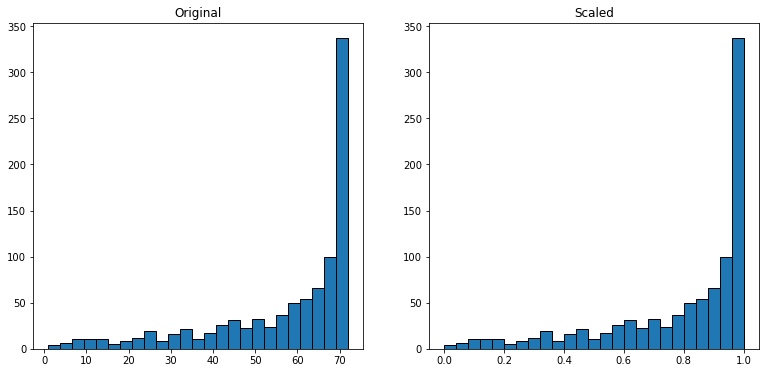

In [22]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_mm.tenure, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

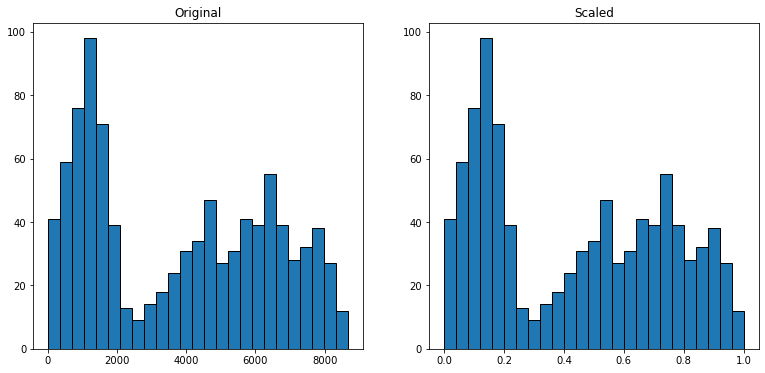

In [23]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.total_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_mm.total_charges, bins=25, ec='black')
plt.title('Scaled')

## Standard

In [24]:
standardscaler = sklearn.preprocessing.StandardScaler()

In [25]:
standardscaler.fit(train)

StandardScaler()

In [26]:
train_scaled_s = standardscaler.transform(train)
validate_scaled_s = standardscaler.transform(validate)
test_scaled_s = standardscaler.transform(test)

In [27]:
train_scaled_s[0:5]

array([[ 0.43308212,  0.71625999,  0.56898961],
       [-1.20057214, -1.54139245, -1.23792963],
       [-1.21341309, -0.52544885, -1.13936969],
       [ 0.65851215,  0.43405343,  0.6342468 ],
       [-1.20057214, -1.88004032, -1.2944422 ]])

In [28]:
# turn the numpy arrays into dataframes
train_scaled_s = pd.DataFrame(train_scaled_s, columns=train.columns)
validate_scaled_s = pd.DataFrame(validate_scaled_s, columns=train.columns)
test_scaled_s = pd.DataFrame(test_scaled_s, columns=train.columns)

In [29]:
train_scaled_s.head()

,monthly_charges,tenure,total_charges
0,0.433082,0.716260,0.568990
1,-1.200572,-1.541392,-1.237930
2,-1.213413,-0.525449,-1.139370
3,0.658512,0.434053,0.634247
4,-1.200572,-1.880040,-1.294442


In [30]:
train.head()

,monthly_charges,tenure,total_charges
customer_id,,,
6586-MYGKD,76.95,70,5289.80
1270-XKUCC,19.70,30,599.25
6425-JWTDV,19.25,48,855.10
6916-HIJSE,84.85,65,5459.20
8173-RXAYP,19.70,24,452.55


Text(0.5, 1.0, 'Scaled')

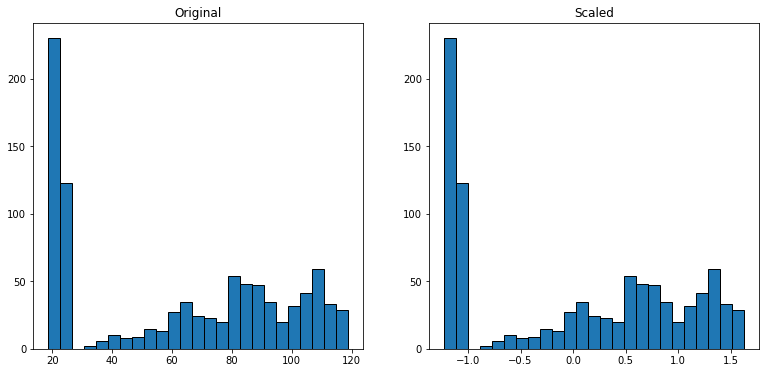

In [31]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_s.monthly_charges, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

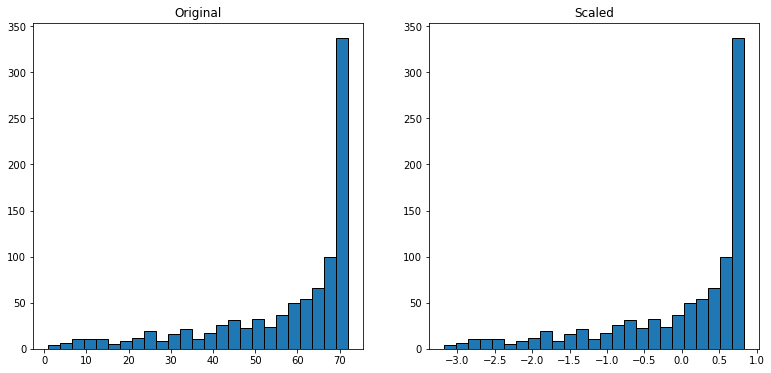

In [32]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_s.tenure, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

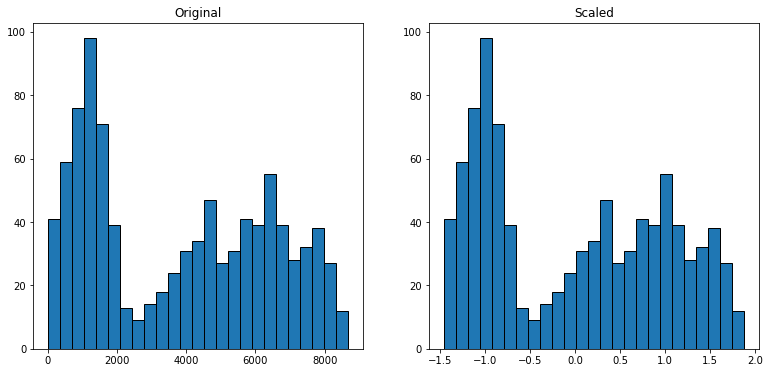

In [33]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.total_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_s.total_charges, bins=25, ec='black')
plt.title('Scaled')

## Robust

In [34]:
robustscaler = sklearn.preprocessing.RobustScaler()

In [35]:
robustscaler.fit(train)

RobustScaler()

In [36]:
train_scaled_r = robustscaler.transform(train)
validate_scaled_r = robustscaler.transform(validate)
test_scaled_r = robustscaler.transform(test)

In [37]:
train_scaled_r[0:5]

array([[ 0.1661154 ,  0.22222222,  0.28376075],
       [-0.67548695, -1.55555556, -0.67073313],
       [-0.68210217, -0.75555556, -0.61866946],
       [ 0.28224917,  0.        ,  0.31823246],
       [-0.67548695, -1.82222222, -0.70058555]])

In [38]:
# turn the numpy arrays into dataframes
train_scaled_r = pd.DataFrame(train_scaled_r, columns=train.columns)
validate_scaled_r = pd.DataFrame(validate_scaled_r, columns=train.columns)
test_scaled_r = pd.DataFrame(test_scaled_r, columns=train.columns)

In [39]:
train_scaled_r.head()

,monthly_charges,tenure,total_charges
0,0.166115,0.222222,0.283761
1,-0.675487,-1.555556,-0.670733
2,-0.682102,-0.755556,-0.618669
3,0.282249,0.000000,0.318232
4,-0.675487,-1.822222,-0.700586


In [40]:
train.head()

,monthly_charges,tenure,total_charges
customer_id,,,
6586-MYGKD,76.95,70,5289.80
1270-XKUCC,19.70,30,599.25
6425-JWTDV,19.25,48,855.10
6916-HIJSE,84.85,65,5459.20
8173-RXAYP,19.70,24,452.55


Text(0.5, 1.0, 'Scaled')

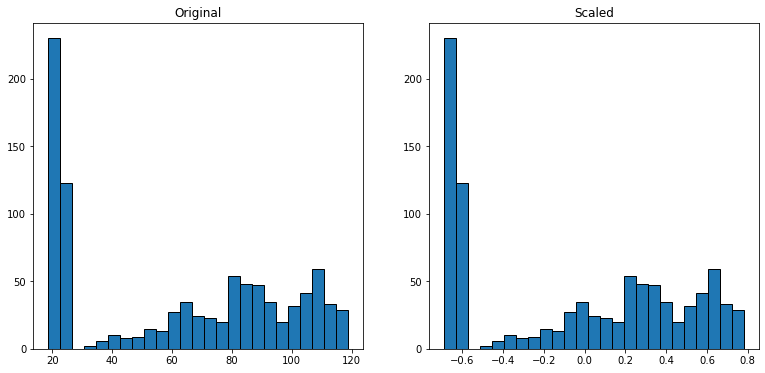

In [41]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_r.monthly_charges, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

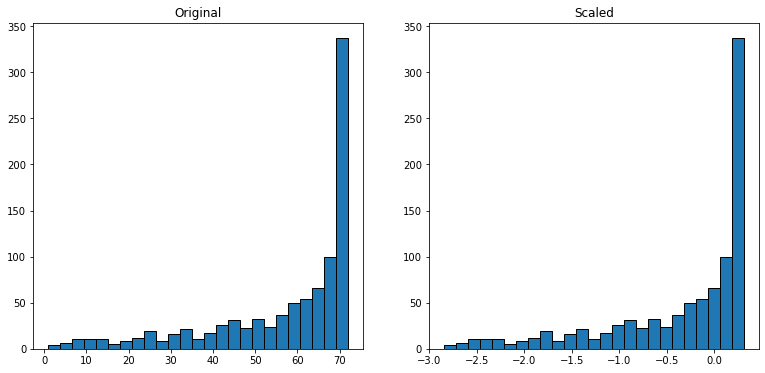

In [42]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_r.tenure, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

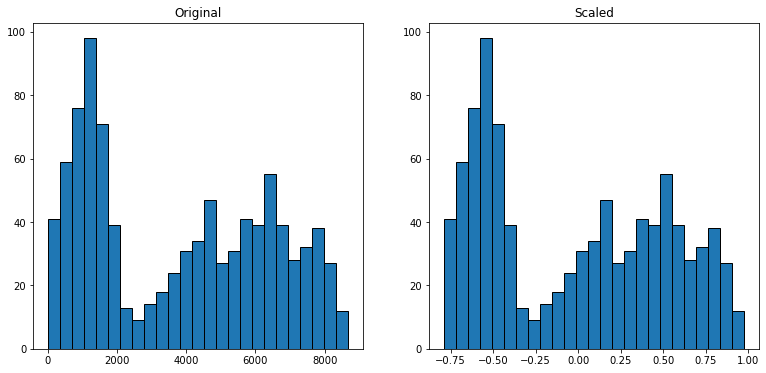

In [43]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.total_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_r.total_charges, bins=25, ec='black')
plt.title('Scaled')

# 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

## Min Max

In [47]:
in_train_scaled_mm = minmaxscaler.inverse_transform(train)
in_validate_scaled_mm = minmaxscaler.inverse_transform(validate)
in_test_scaled_mm = minmaxscaler.inverse_transform(test)

In [48]:
# turn the numpy arrays into dataframes
in_train_scaled_mm = pd.DataFrame(in_train_scaled_mm, columns=train.columns)
in_validate_scaled_mm = pd.DataFrame(in_validate_scaled_mm, columns=train.columns)
in_test_scaled_mm = pd.DataFrame(in_test_scaled_mm, columns=train.columns)

In [49]:
in_train_scaled_mm.head()

,monthly_charges,tenure,total_charges
0,7717.5475,4971.0,45767370.05
1,1989.6850,2131.0,5184731.45
2,1944.6625,3409.0,7398345.65
3,8507.9425,4616.0,47233018.85
4,1989.6850,1705.0,3915483.05


In [50]:
train_scaled_mm.head()

,monthly_charges,tenure,total_charges
0,0.582209,0.971831,0.609033
1,0.009995,0.408451,0.066898
2,0.005497,0.661972,0.096469
3,0.661169,0.901408,0.628612
4,0.009995,0.323944,0.049942


Text(0.5, 1.0, 'Inverse')

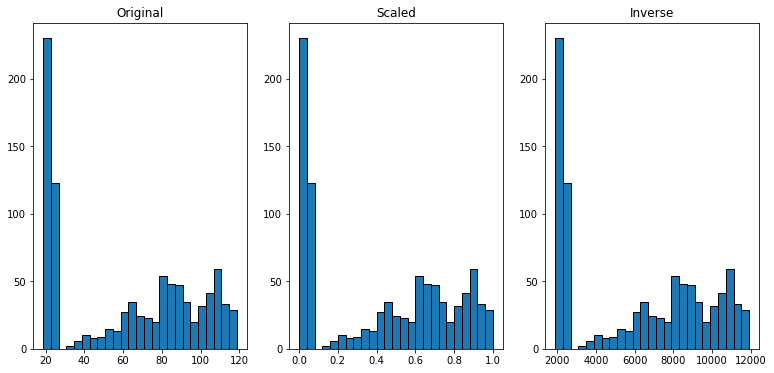

In [51]:
plt.figure(figsize=(13, 6))
plt.subplot(131)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(132)
plt.hist(train_scaled_mm.monthly_charges, bins=25, ec='black')
plt.title('Scaled')
plt.subplot(133)
plt.hist(in_train_scaled_mm.monthly_charges, bins=25, ec='black')
plt.title('Inverse')

Text(0.5, 1.0, 'Inverse')

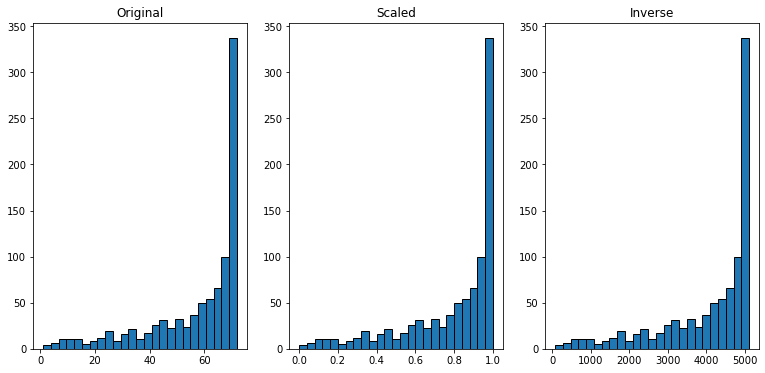

In [62]:
plt.figure(figsize=(13, 6))
plt.subplot(131)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original')
plt.subplot(132)
plt.hist(train_scaled_mm.tenure, bins=25, ec='black')
plt.title('Scaled')
plt.subplot(133)
plt.hist(in_train_scaled_mm.tenure, bins=25, ec='black')
plt.title('Inverse')

Text(0.5, 1.0, 'Inverse')

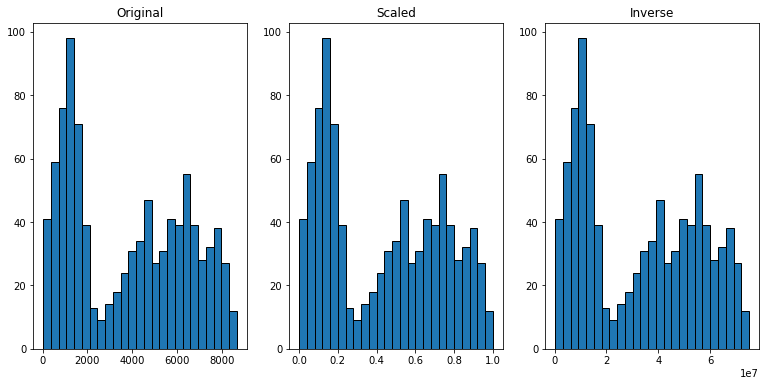

In [63]:
plt.figure(figsize=(13, 6))
plt.subplot(131)
plt.hist(train.total_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(132)
plt.hist(train_scaled_mm.total_charges, bins=25, ec='black')
plt.title('Scaled')
plt.subplot(133)
plt.hist(in_train_scaled_mm.total_charges, bins=25, ec='black')
plt.title('Inverse')

## Standard

In [52]:
in_train_scaled_s = standardscaler.inverse_transform(train)
in_validate_scaled_s = standardscaler.inverse_transform(validate)
in_test_scaled_s = standardscaler.inverse_transform(test)

In [53]:
# turn the numpy arrays into dataframes
in_train_scaled_s = pd.DataFrame(in_train_scaled_s, columns=train.columns)
in_validate_scaled_s = pd.DataFrame(in_validate_scaled_s, columns=train.columns)
in_test_scaled_s = pd.DataFrame(in_test_scaled_s, columns=train.columns)

In [54]:
in_train_scaled_s.head()

,monthly_charges,tenure,total_charges
0,2758.419179,1297.535980,1.373551e+07
1,752.142466,588.835220,1.559395e+06
2,736.372605,907.750562,2.223552e+06
3,3035.267844,1208.948385,1.417525e+07
4,752.142466,482.530106,1.178579e+06


In [55]:
train_scaled_s.head()

,monthly_charges,tenure,total_charges
0,0.433082,0.716260,0.568990
1,-1.200572,-1.541392,-1.237930
2,-1.213413,-0.525449,-1.139370
3,0.658512,0.434053,0.634247
4,-1.200572,-1.880040,-1.294442


Text(0.5, 1.0, 'Inverse')

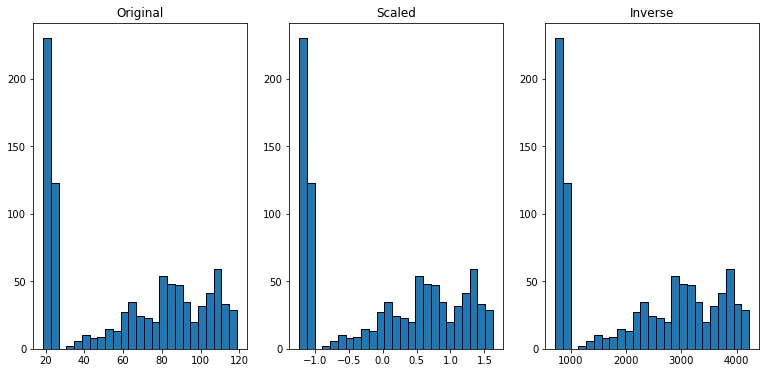

In [56]:
plt.figure(figsize=(13, 6))
plt.subplot(131)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(132)
plt.hist(train_scaled_s.monthly_charges, bins=25, ec='black')
plt.title('Scaled')
plt.subplot(133)
plt.hist(in_train_scaled_s.monthly_charges, bins=25, ec='black')
plt.title('Inverse')

Text(0.5, 1.0, 'Inverse')

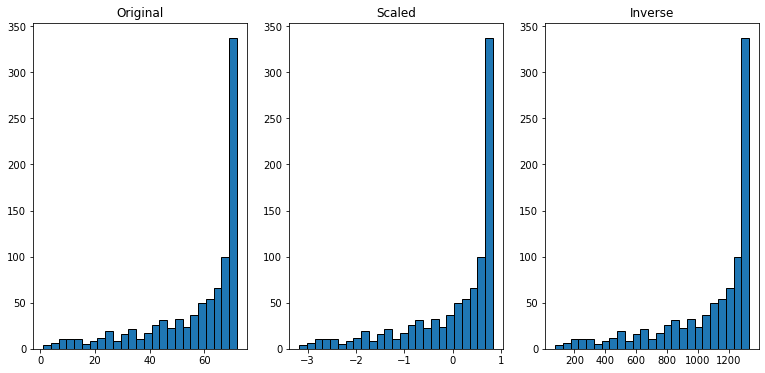

In [64]:
plt.figure(figsize=(13, 6))
plt.subplot(131)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original')
plt.subplot(132)
plt.hist(train_scaled_s.tenure, bins=25, ec='black')
plt.title('Scaled')
plt.subplot(133)
plt.hist(in_train_scaled_s.tenure, bins=25, ec='black')
plt.title('Inverse')

Text(0.5, 1.0, 'Inverse')

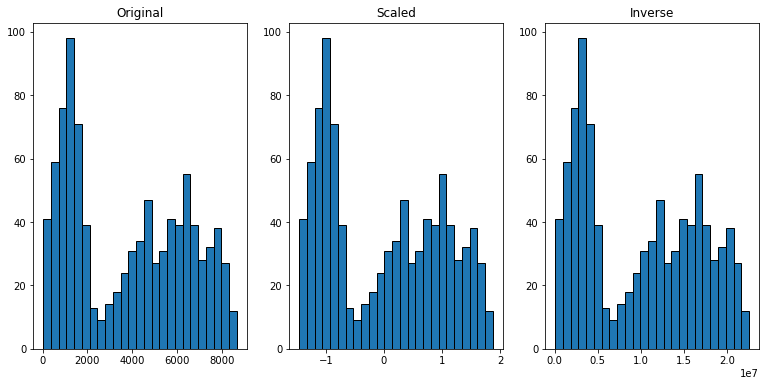

In [65]:
plt.figure(figsize=(13, 6))
plt.subplot(131)
plt.hist(train.total_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(132)
plt.hist(train_scaled_s.total_charges, bins=25, ec='black')
plt.title('Scaled')
plt.subplot(133)
plt.hist(in_train_scaled_s.total_charges, bins=25, ec='black')
plt.title('Inverse')

## Robust

In [57]:
in_train_scaled_r = robustscaler.inverse_transform(train)
in_validate_scaled_r = robustscaler.inverse_transform(validate)
in_test_scaled_r = robustscaler.inverse_transform(test)

In [58]:
# turn the numpy arrays into dataframes
in_train_scaled_r = pd.DataFrame(in_train_scaled_r, columns=train.columns)
in_validate_scaled_r = pd.DataFrame(in_validate_scaled_r, columns=train.columns)
in_test_scaled_r = pd.DataFrame(in_test_scaled_r, columns=train.columns)

In [59]:
in_train_scaled_r.head()

,monthly_charges,tenure,total_charges
0,5300.17375,1640.0,2.599890e+07
1,1405.74250,740.0,2.948715e+06
2,1375.13125,1145.0,4.206006e+06
3,5837.57125,1527.5,2.683136e+07
4,1405.74250,605.0,2.227805e+06


In [60]:
train_scaled_r.head()

,monthly_charges,tenure,total_charges
0,0.166115,0.222222,0.283761
1,-0.675487,-1.555556,-0.670733
2,-0.682102,-0.755556,-0.618669
3,0.282249,0.000000,0.318232
4,-0.675487,-1.822222,-0.700586


Text(0.5, 1.0, 'Inverse')

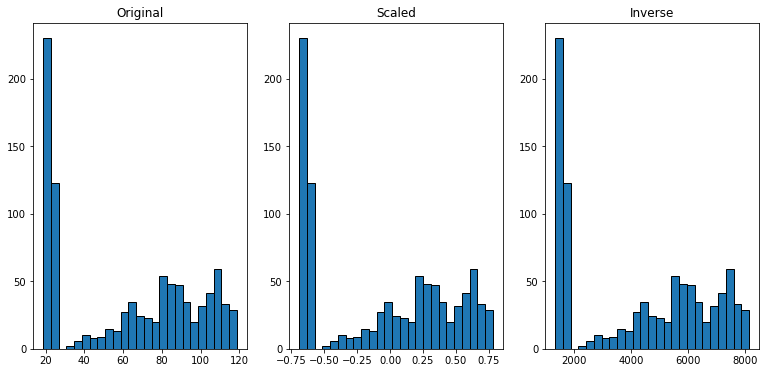

In [61]:
plt.figure(figsize=(13, 6))
plt.subplot(131)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(132)
plt.hist(train_scaled_r.monthly_charges, bins=25, ec='black')
plt.title('Scaled')
plt.subplot(133)
plt.hist(in_train_scaled_r.monthly_charges, bins=25, ec='black')
plt.title('Inverse')

Text(0.5, 1.0, 'Inverse')

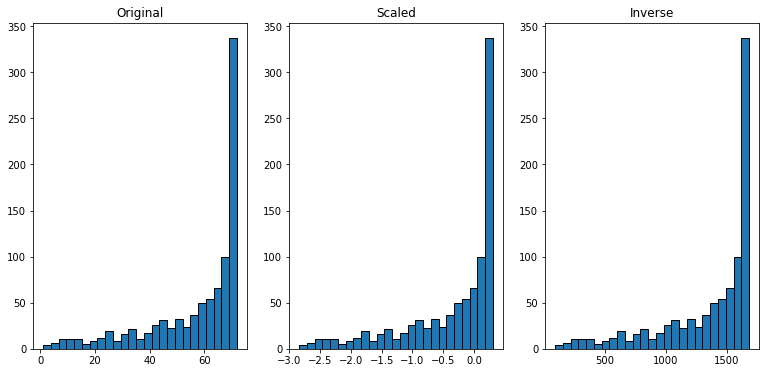

In [66]:
plt.figure(figsize=(13, 6))
plt.subplot(131)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original')
plt.subplot(132)
plt.hist(train_scaled_r.tenure, bins=25, ec='black')
plt.title('Scaled')
plt.subplot(133)
plt.hist(in_train_scaled_r.tenure, bins=25, ec='black')
plt.title('Inverse')

Text(0.5, 1.0, 'Inverse')

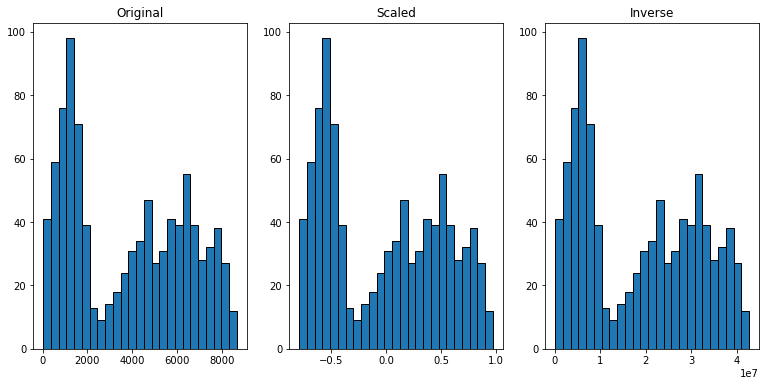

In [67]:
plt.figure(figsize=(13, 6))
plt.subplot(131)
plt.hist(train.total_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(132)
plt.hist(train_scaled_r.total_charges, bins=25, ec='black')
plt.title('Scaled')
plt.subplot(133)
plt.hist(in_train_scaled_r.total_charges, bins=25, ec='black')
plt.title('Inverse')

# 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [68]:
quantilescaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

In [69]:
quantilescaler.fit(train)

QuantileTransformer(output_distribution='normal')

In [70]:
train_scaled_q = quantilescaler.transform(train)
validate_scaled_q = quantilescaler.transform(validate)
test_scaled_q = quantilescaler.transform(test)

In [71]:
# turn the numpy arrays into dataframes
train_scaled_q = pd.DataFrame(train_scaled_q, columns=train.columns)
validate_scaled_q = pd.DataFrame(validate_scaled_q, columns=train.columns)
test_scaled_q = pd.DataFrame(test_scaled_q, columns=train.columns)

In [72]:
train_scaled_q.head()

,monthly_charges,tenure,total_charges
0,0.184650,0.443903,0.373025
1,-1.336063,-1.247227,-1.372682
2,-2.159833,-0.689600,-1.074993
3,0.424895,0.000000,0.410378
4,-1.336063,-1.418479,-1.577634


In [73]:
train.head()

,monthly_charges,tenure,total_charges
customer_id,,,
6586-MYGKD,76.95,70,5289.80
1270-XKUCC,19.70,30,599.25
6425-JWTDV,19.25,48,855.10
6916-HIJSE,84.85,65,5459.20
8173-RXAYP,19.70,24,452.55


Text(0.5, 1.0, 'Scaled')

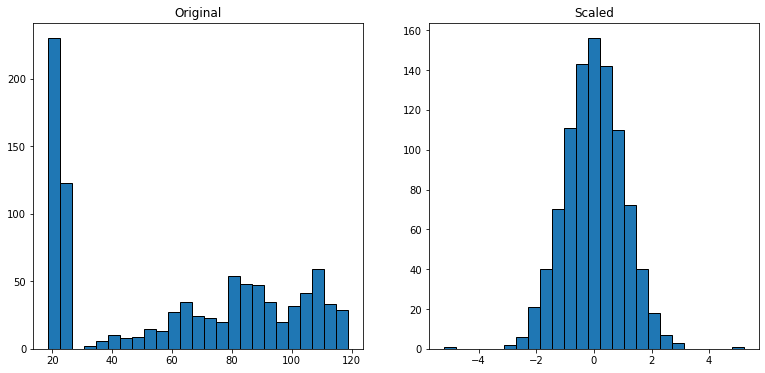

In [74]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_q.monthly_charges, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

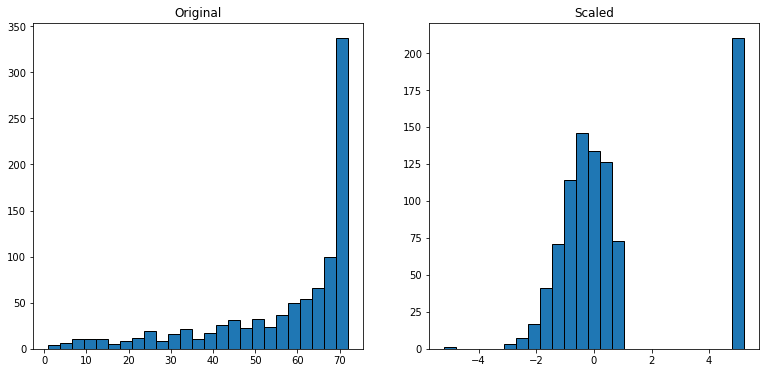

In [75]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_q.tenure, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

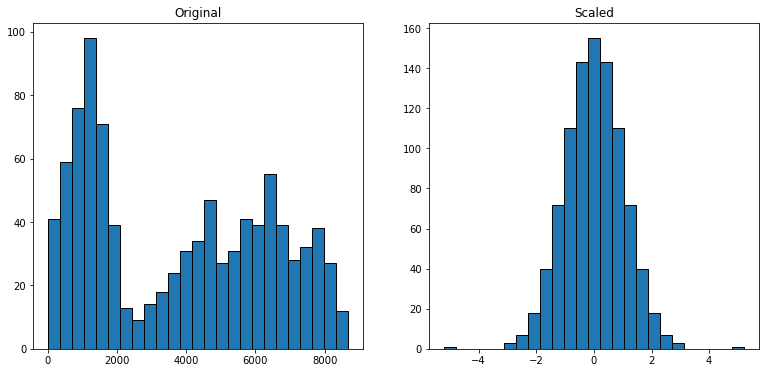

In [76]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.total_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_q.total_charges, bins=25, ec='black')
plt.title('Scaled')

# 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [77]:
omitscaler = sklearn.preprocessing.QuantileTransformer()

In [78]:
omitscaler.fit(train)

QuantileTransformer()

In [79]:
train_scaled_o = omitscaler.transform(train)
validate_scaled_o = omitscaler.transform(validate)
test_scaled_o = omitscaler.transform(test)

In [80]:
# turn the numpy arrays into dataframes
train_scaled_o = pd.DataFrame(train_scaled_o, columns=train.columns)
validate_scaled_o = pd.DataFrame(validate_scaled_o, columns=train.columns)
test_scaled_o = pd.DataFrame(test_scaled_o, columns=train.columns)

In [81]:
train_scaled_o.head()

,monthly_charges,tenure,total_charges
0,0.573248,0.671444,0.645435
1,0.090764,0.106157,0.084926
2,0.015393,0.245223,0.141189
3,0.664544,0.500000,0.659236
4,0.090764,0.078025,0.057325


In [82]:
train.head()

,monthly_charges,tenure,total_charges
customer_id,,,
6586-MYGKD,76.95,70,5289.80
1270-XKUCC,19.70,30,599.25
6425-JWTDV,19.25,48,855.10
6916-HIJSE,84.85,65,5459.20
8173-RXAYP,19.70,24,452.55


Text(0.5, 1.0, 'Scaled')

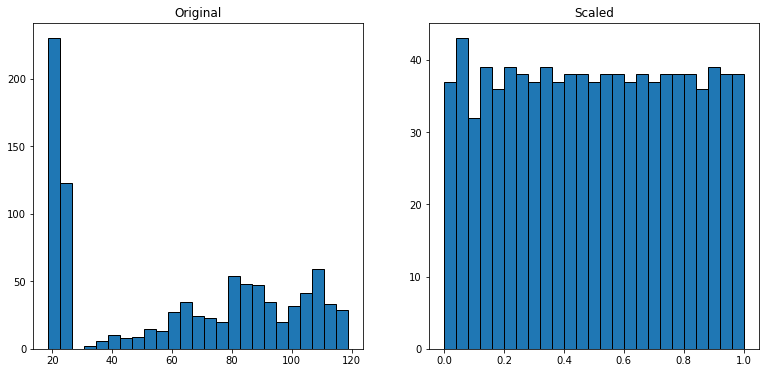

In [83]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_o.monthly_charges, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

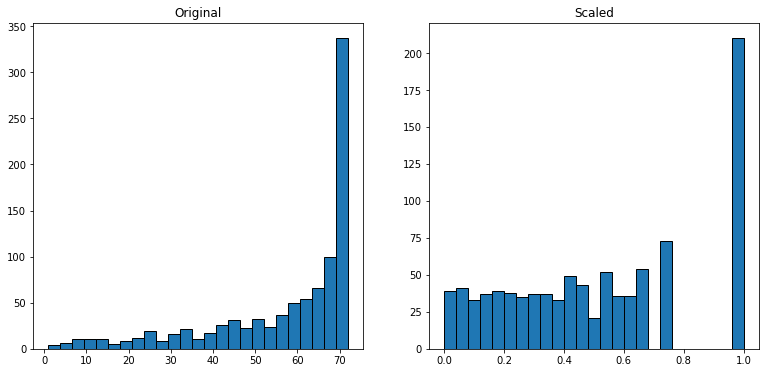

In [84]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_o.tenure, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

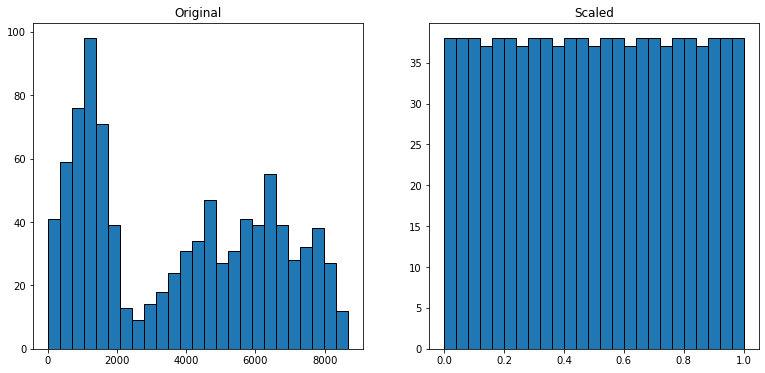

In [85]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.total_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_o.total_charges, bins=25, ec='black')
plt.title('Scaled')

# 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [86]:
def scale_data(train, validate, test):
    
    '''
    This function will scale numeric data using Min Max transform after 
    it has already been split into train, validate, and test.
    '''
    
    # Make the thing
    scaler = sklearn.preprocessing.MinMaxScaler()
    
    # We fit on the training data
    # we only .fit on the training data
    scaler.fit(train)
    
    train_scaled = scaler.transform(train)
    validate_scaled = scaler.transform(validate)
    test_scaled = scaler.transform(test)
    
    # turn the numpy arrays into dataframes
    train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
    validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
    test_scaled = pd.DataFrame(test_scaled, columns=train.columns)
    
    return train_scaled, validate_scaled, test_scaled

In [88]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test)

In [89]:
train_scaled.head()

,monthly_charges,tenure,total_charges
0,0.582209,0.971831,0.609033
1,0.009995,0.408451,0.066898
2,0.005497,0.661972,0.096469
3,0.661169,0.901408,0.628612
4,0.009995,0.323944,0.049942


In [90]:
train_scaled_mm.head()

,monthly_charges,tenure,total_charges
0,0.582209,0.971831,0.609033
1,0.009995,0.408451,0.066898
2,0.005497,0.661972,0.096469
3,0.661169,0.901408,0.628612
4,0.009995,0.323944,0.049942
